In [ ]:
#UPDATE this cell with your data source + Dictionary/Codebook
#data source: https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html
#data dictionary: https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf

In [1]:
#import necessary libaries
import pandas as pd
import matplotlib

In [2]:
#name file path (you will have download your own dataset and populate the path and choose the appropriate cell to execute)
file = 'asecpub21csv/pppub21.csv' # <-- edit this value! 

In [ ]:
#you will run just ONE of the next three code blocks, depending on the file type of your dataset

In [3]:
#read data from CSV & print head
df = pd.read_csv(file)
print(df.head())

                 PERIDNUM  PH_SEQ  P_SEQ  A_LINENO  PF_SEQ  PHF_SEQ  OED_TYP1  \
0  8238946011902051101101       1      1         1       1        1         0   
1  8238946011902051101102       1      2         2       1        1         0   
2  8238946011902051101103       1      3         3       1        1         0   
3  6092052593105071201101       2      1         1       1        1         0   
4  6092052593105071201102       2      2         2       1        1         0   

   OED_TYP2  OED_TYP3  PERRP  ...  I_DISVL1  I_DISVL2  I_SURVL1  I_SURVL2  \
0         0         0     40  ...         0         0         0         0   
1         0         0     42  ...         0         0         0         0   
2         0         0     50  ...         0         0         0         0   
3         0         0     40  ...         0         0         0         0   
4         0         0     42  ...         0         0         0         0   

   MIG_CBST  MIG_DSCP  DEP_STAT  FILEDATE  FILESTA

In [ ]:
#read data from SAS & print head
df = pd.read_sas(file)
print(df.head())

In [ ]:
#read data from excel & print head
df = pd.read_excel(file)
print(df.head())

In [ ]:
#list columns in data frame
print(list(df))

In [4]:
#output frequency table of chosen column in dataset
col = 'A_HGA' #<-edit this value! column name as it appears in dataframe
col_name = 'Educational Attainment' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

    Educational Attainment   freq
1                        0  34433
16                      31    395
15                      32    769
14                      33   1518
10                      34   2755
9                       35   3626
8                       36   4018
7                       37   4355
12                      38   2073
0                       39  35114
3                       40  20654
6                       41   5312
5                       42   7145
2                       43  25979
4                       44  11358
13                      45   1687
11                      46   2352


In [5]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['0', 'Children'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['31', 'Less than 1st grade'], 
            ['32', '1st,2nd,3rd,or 4th grade'], 
            ['33', '5th or 6th grade'], 
            ['34', '7th and 8th grade'], 
            ['35', '9th grade'], 
            ['36', '10th grade'], 
            ['37', '11th grade'], 
            ['38', '12th grade no diploma'], 
            ['39', 'High school graduate - high school diploma or equivalent'], 
              ['40', 'Some college but no degree'], 
            ['41', 'Associate degree in college - occupation/vocation'], 
            ['42', 'Associate degree in college - academic program'], 
            ['43', "Bachelor's degree (for example: BA,AB,BS)"], 
            ['44', "Master's degree"],
            ['45', 'Professional school degree'], 
            ['46', 'Doctorate degree']]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])

#prints updated frequency table
print(freq)

                               Educational Attainment   freq
1                                            Children  34433
16                                Less than 1st grade    395
15                           1st,2nd,3rd,or 4th grade    769
14                                   5th or 6th grade   1518
10                                  7th and 8th grade   2755
9                                           9th grade   3626
8                                          10th grade   4018
7                                          11th grade   4355
12                              12th grade no diploma   2073
0   High school graduate - high school diploma or ...  35114
3                          Some college but no degree  20654
6   Associate degree in college - occupation/vocation   5312
5      Associate degree in college - academic program   7145
2           Bachelor's degree (for example: BA,AB,BS)  25979
4                                     Master's degree  11358
13                      

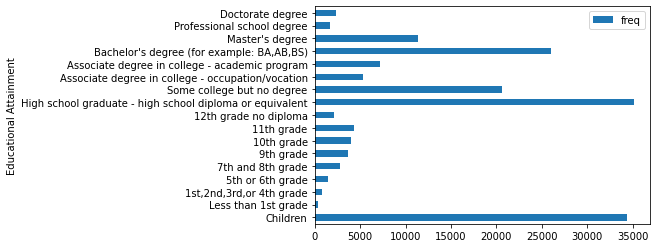

In [6]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)